In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import matplotlib.ticker as ticker
from scipy.stats import norm
import statsmodels.api as sm

%matplotlib inline

### Task 1

#### The Ornstein-Uhlenbeck process:   

$$dX_{t} = -\theta X_{t} + \sigma d W_{t}$$
$$ X(0) = 10$$
$$ \theta = 5 $$  
$$ \sigma = 3.5 $$

In [2]:
def BM(T, N):
    W =[]
    W += [0]
    Delta = T / N
    X =[i / 100 for i in range(101)]
    for i in range(1, len(X)) :
        W += [W[i - 1] + np.random.normal(0, 1, 1)[0] * np.sqrt(Delta)]
    return W


In [3]:
N = 100
T =1
x = 10
theta = 5
sigma = 3.5

W = BM(T, N)
t =[i / 100 for i in range(101)]
X = [0 for i in range(N)]
X [0]= x
ito_sum =[np.exp(-theta * (t[i] - t[i - 1])) * (W[i] - W[i - 1]) for i in range(1, N)]
X = [X[0] * np.exp(-theta * t[i]) + sum(ito_sum[0 : i]) for i in range(N)]
X = [X[0]] + X

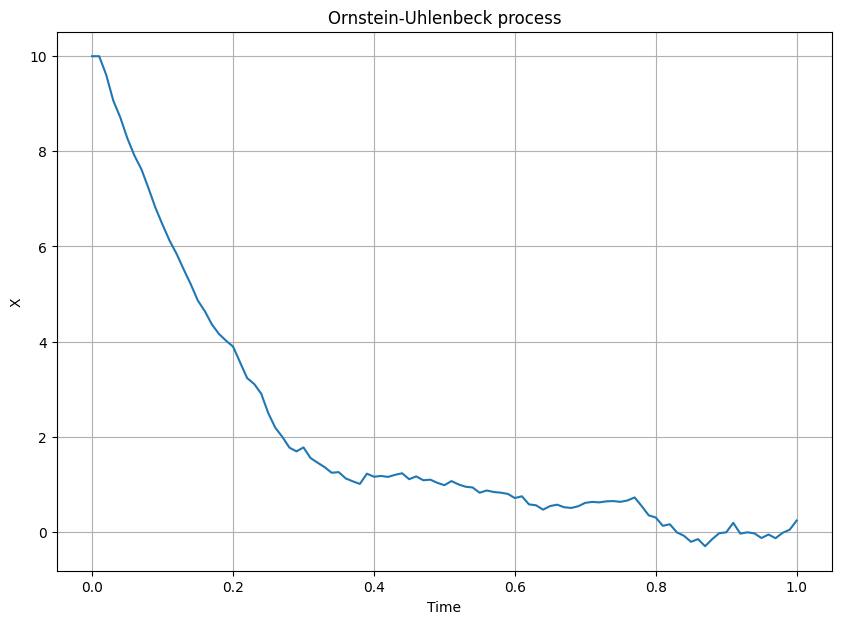

In [4]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(t , X)
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

#### The Cox-Ingersoll-Ross process
$$ dX_{t} = (\theta _{1} - \theta _{2} X_{t})dt + \theta_{3} \sqrt{X_{t}}dW_{t}$$
#### sometimes parametrized as
$$ dX_{t} = \theta(\beta - X_{t})dt + \sigma \sqrt{X_{t}}dW_{t}$$
$$ X_{0} = x_{0} > 0$$
$$ \theta = (2.0, 0.2, 0.15)$$

In [5]:
def CIR1(X, theta1, theta2, theta3, dt):
    DX = (theta1 - theta2 * X) * dt + theta3 * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [6]:
def CIR2(X, theta, beta, sigma, dt):
    DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [7]:
theta1 = 1
theta2 = 2
theta3 = 0.3

N = 1000
X = np.zeros(N)
X[0] = 10
theta = 5
sigma = 3.5
beta = 1.1
for i in range(1, len(X)):
    X[i] = X[i - 1] + CIR2(X[i - 1], theta, beta, sigma, 1 / N)

/tmp/ipykernel_8790/285255002.py:2: RuntimeWarning: invalid value encountered in sqrt
  DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


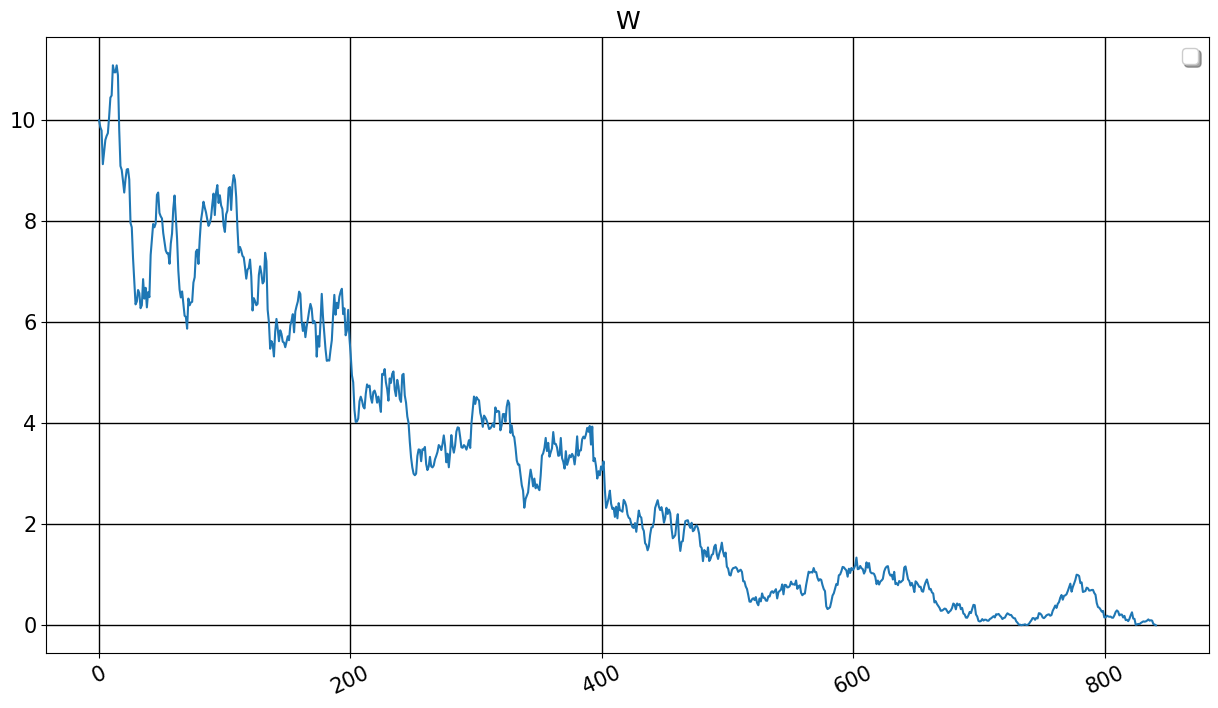

In [8]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

#### the Black-Scholes process
$$ dS_{t} = \mu S_{t}dt + \sigma S_{t}dW_{t}$$

In [9]:
def BSM(X, theta1, theta2, dt):
    DX = theta1 * X * dt + theta2 * X * np.random.normal(0, np.sqrt(dt))
    return DX

In [10]:
N = 10000
X = np.zeros(N)
X[0] = 10
theta1 = -1.0
theta2 = 0.2
for i in range(1, len(X)):
    X[i] = X[i - 1] + BSM(X[i - 1], theta1, theta2, 1 / N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


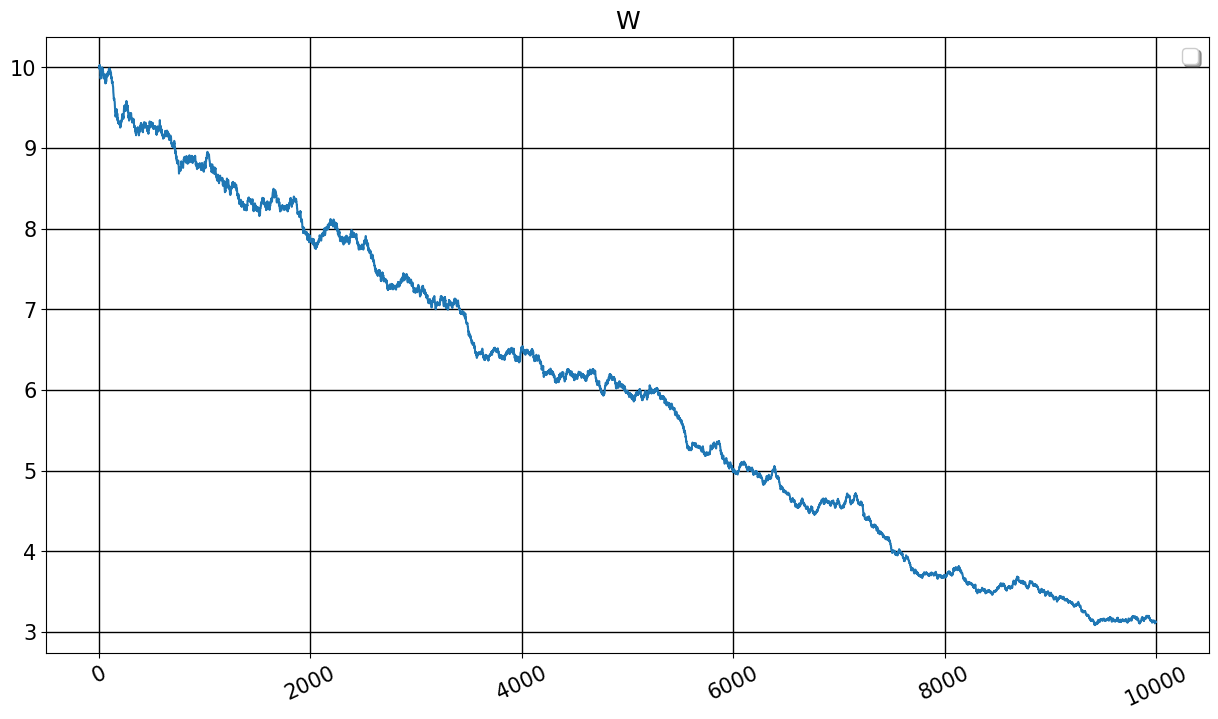

In [11]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

### Task 2

$$ k = {4 \alpha \over \sigma^{2}}$$

$$ \zeta = {\sigma^{2} (1 - e^{-\beta(t - s)}) \over 4\beta}$$

$$\lambda = {4\beta e^{-\beta(t - s)} x(s) \over \sigma^{2}(1 - e^{- \beta (t - s)})}$$

$$ \xi = F^{-1}_{N(0,1)} \left(1 - {\alpha \over 2}\right)$$
$$ v_{lower}(s, t) = \zeta \left(k + \lambda - \xi \sqrt{2(k + 2\lambda)}\right) $$

$$ v_{upper}(s, t) = \zeta \left(k + \lambda + \xi \sqrt{2(k + 2\lambda)}\right) $$


In [12]:
def param_k(alpha, sigma):
    return (4 * alpha) / (sigma ** 2)

In [13]:
def param_zeta(t, s, N, sigma, beta):
    return (sigma ** 2) * (1 - np.exp(-beta * (t / N - s / N))) / (4 * beta)

In [14]:
def param_lambda(t, s, N, x, sigma, beta):
    return 4 * beta * np.exp(-beta * (t / N - s / N)) * x / (sigma ** 2 * (1 - np.exp(-beta * (t / N - s / N))))

In [15]:
def param_xi(alpha_0):
    return norm.ppf(1 - alpha_0/2)

In [16]:
def v_lower(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda - xi * np.sqrt(2 * (k + 2 * my_lambda)))

In [17]:
def v_upper(k, zeta, my_lambda, xi):
    return zeta * (k + my_lambda + xi * np.sqrt(2 * (k + 2 * my_lambda)))

In [18]:
def CIR2(X, theta, beta, sigma, dt):
    DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [19]:
N = 100
X = np.zeros((100, N))
theta = 0.1
sigma = 0.1
beta = 0.1
for j in range(0, 100):
    X[j][0] = 10
    for i in range(1, N):
        X[j][i] = X[j][i - 1] + CIR2(X[j][i - 1], theta, beta, sigma, 1 / N)

In [20]:
V_LOWER = np.zeros(N)
V_UPPER = np.zeros(N)
V_LOWER[0] = X[0][0]
V_UPPER[0] = X[0][0]

alpha = 0.02
k = param_k(theta, sigma)
xi = param_xi(alpha)

for i in range(1, N):
    zeta = param_zeta(i, 0, N, sigma, beta)
    my_lambda = param_lambda(i, 0, N, 10, sigma, beta)
    V_LOWER[i] = v_lower(k, zeta, my_lambda, xi)
    V_UPPER[i] = v_upper(k, zeta, my_lambda, xi)

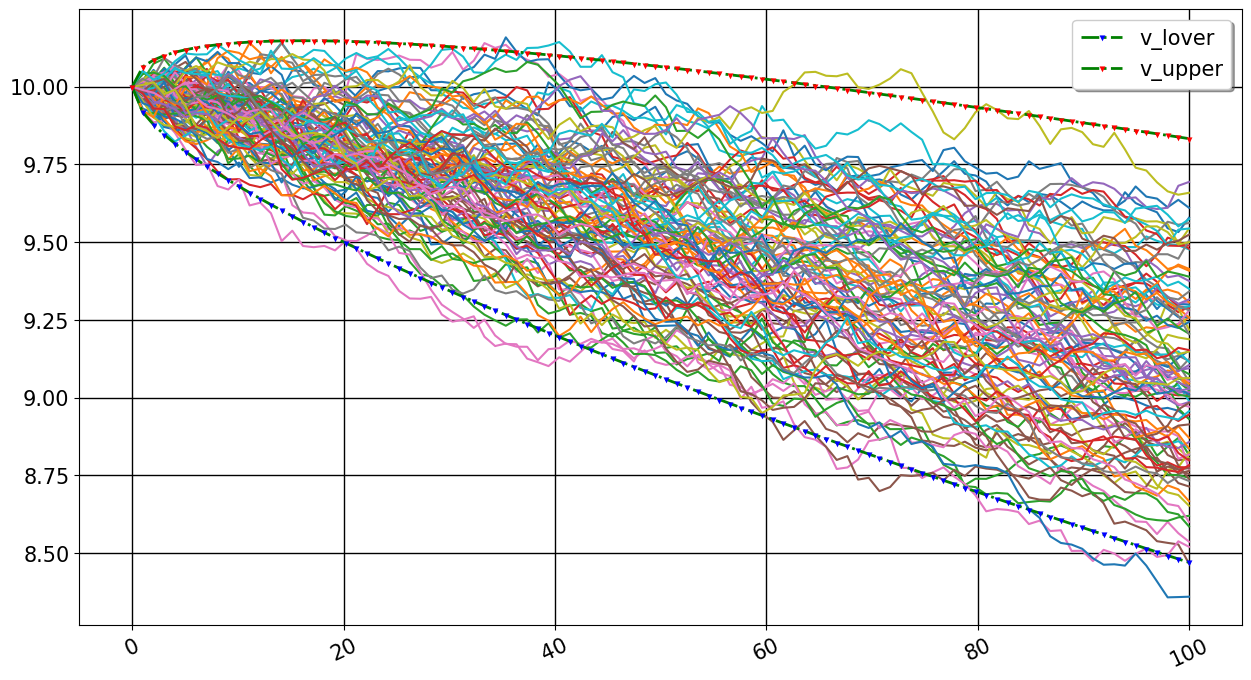

In [21]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
for j in range(100):
    plt.plot(np.linspace(0, N, N), X[j])

plt.plot(np.linspace(0, N, N), V_LOWER, 'v-.g', label="v_lover", mec='b', lw=2, mew=2, ms=1)
plt.plot(np.linspace(0, N, N), V_UPPER, 'v-.g', label="v_upper", mec='r', lw=2, mew=2, ms=1)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.show()

### Task 3
#### The Ornstein-Uhlenbeck process:   

$$dX_{t} = \theta (\mu  - X_{t})dt + \sigma d W_{t}$$
$$ X(0) = 0.0, 2.0, N(\mu, {\sigma^{2} \over 2\theta})$$
$$ \theta = 1 $$
$$ \mu = 1.2 $$  
$$ \sigma = 0.3 $$

In [22]:
def OU(X, theta, mu, sigma, dt):
    dX = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dX

In [23]:
N = 10000
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)
theta = 1.0
mu = 1.2
sigma = 0.3
Z[0] = np.random.normal(mu, (sigma ** 2) / 2 * theta)
Y[0] = 0.0
X[0] = 2.0
for i in range(1, len(X)):
    X[i] = X[i - 1] + OU(X[i - 1], theta, mu, sigma, 1 / N)
    Y[i] = Y[i - 1] + OU(Y[i - 1], theta, mu, sigma, 1 / N)
    Z[i] = Z[i - 1] + OU(Z[i - 1], theta, mu, sigma, 1 / N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


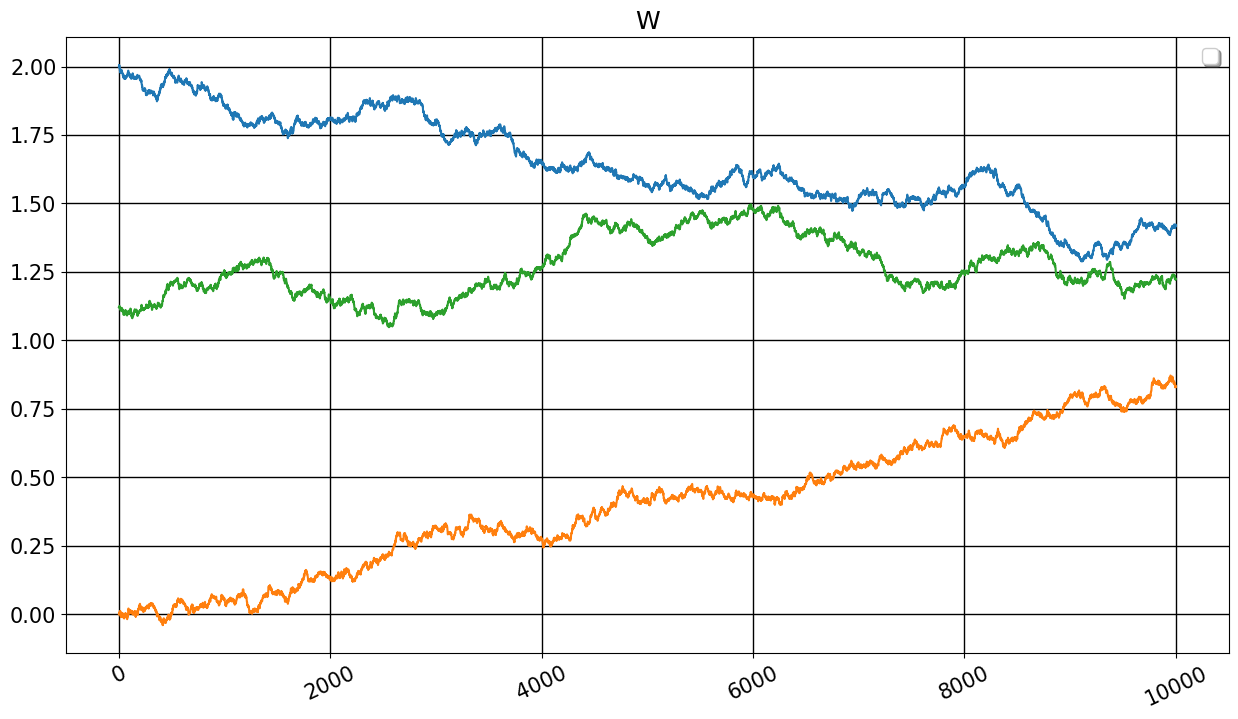

In [24]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X)
plt.plot(np.linspace(0, N, N), Y)
plt.plot(np.linspace(0, N, N), Z)

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

### Task 4

Design a process that stays in the interval [0, 1] and mean-reverts around
1/2, generate and plot in graph.

In [30]:
def OU(X, theta, mu, sigma, dt):
    dX = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dX

In [33]:
theta = 1000
mu = 10
sigma = 0.1
N = 100000
S = np.zeros(N)
S[0] = mu
for i in range(1, N):
    S[i] = S[i - 1] + OU(S[i - 1], theta, mu, sigma, 1 / N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


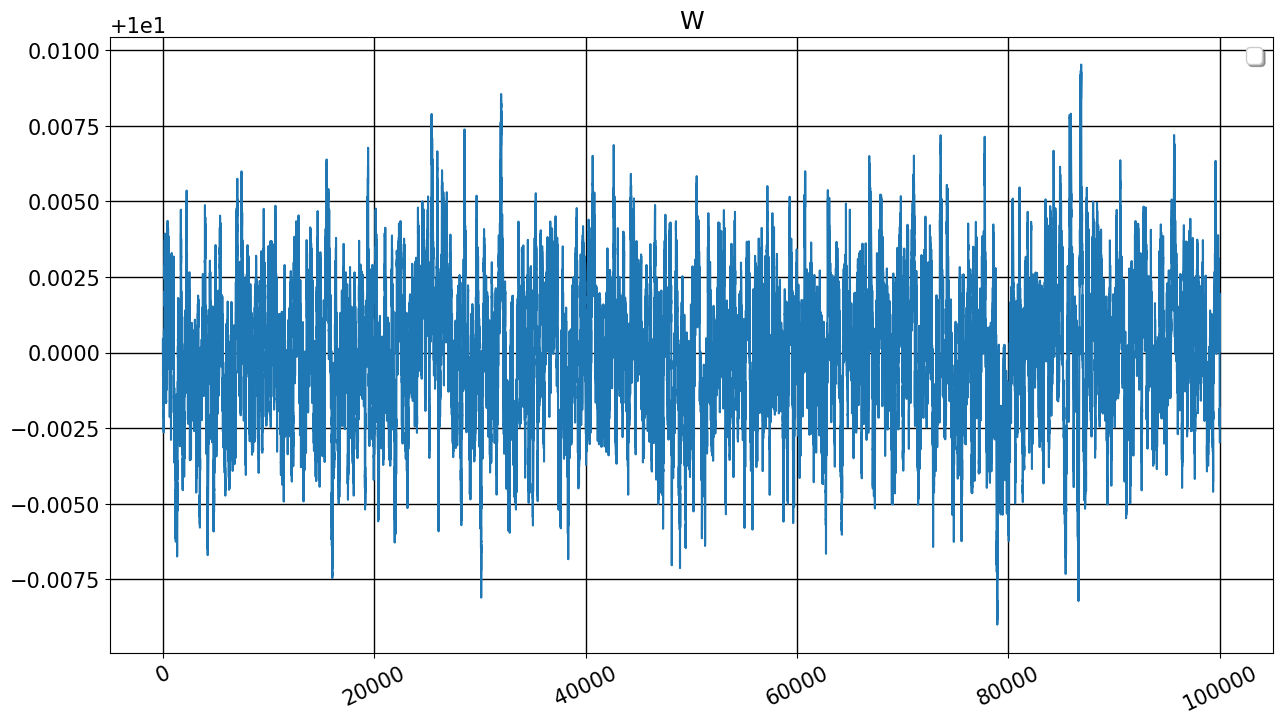

In [34]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()
plt.plot(np.linspace(0.0, len(S), num=len(S)), S, label='')

ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание
plt.legend(loc = 'best', fancybox = True, shadow = True)

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # интервал написания значений оси OX
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.0005))  # интервал написания значений оси OY
plt.xticks(rotation=25)
fig.set_figwidth(15)
fig.set_figheight(8)

plt.title('W')
plt.show()

### Task 5

Ornstein – Uhlenbeck process is a mean-reverting process, which is described by the SDE
$$ dX_{t} = \theta (\mu  - X_{t})dt + \sigma d W_{t}$$
$$ E(X_{t}) = e^{-\alpha t} X_{0} + \mu(1 - e^{-\alpha t}) $$
$$ Var(X_{t}) = {\sigma^{2} \over 2 \alpha} (1 - e^{-\alpha t}) $$
$$ x(t_{1 \over 2}) - \mu = {x_{0} - \mu \over 2}$$
$$ t_{1 \over 2} = {log2 \over \alpha}  $$

In [ ]:
def OU(X, theta, mu, sigma, dt):
    dX = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dX

In [ ]:
def expected_value_OU(X, theta, mu, t):
    exceptted_value = np.exp(-theta * t) * X + mu * (1 - np.exp(-theta * t))
    return exceptted_value

In [ ]:
def variance_OU(theta, sigma, t):
    variance = ((sigma ** 2) / (2 * theta)) * (1 - np.exp(-2 * theta * t))
    return variance

In [ ]:
def x_t_1_over_2(x_0, theta, mu):
    t = np.log2(2) / theta
    return (x_0 + mu) / 2

In [ ]:
theta = 1000
mu = 0.5
sigma = 0.1
N = 10000
S = np.zeros(N)
S[0] = 0.5
for i in range(1, N):
    S[i] = S[i - 1] + OU(S[i - 1], theta, mu, sigma, 1 / N)

In [ ]:
expected_value_OU(S[5], theta, mu, N)

0.5

In [ ]:
variance_OU(theta, sigma, N)

5.000000000000001e-06

In [ ]:
half_time = np.zeros(N)
half_time[0] = 0.5
for i in range(1, N):
    half_time[i] = x_t_1_over_2(S[i], theta, mu)

In [ ]:
def half_mean_reversed(alpha, mu, N):
    t = np.linspace(0, T, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    sigma = 0.1
    x_half = np.zeros(N + 1)
    dt = 1 / N
    for it in range(1, N + 1): 
        dxt = alpha * (mu - x[it-1]) * dt + sigma * np.random.normal(0, np.sqrt(dt))
        x[it] = x[it - 1] + dxt
    
    z_lag = np.roll(x, 1)
    z_lag[0] = 0
    z_ret = x - z_lag
    z_ret[0] = 0
    print(z_ret)
    #adds intercept terms to X variable for regression
    z_lag2 = sm.add_constant(z_lag)
    model = sm.OLS(z_ret,z_lag2)
    res = model.fit()
    print(res.params)
    halflife = abs((np.log(2) / res.params[1]) / 365 * T)
    return x, halflife

[ 0.          0.00827337 -0.00214649 ... -0.00294732  0.00062176
  0.00055506]
[ 0.00334372 -0.00641334]
109.0


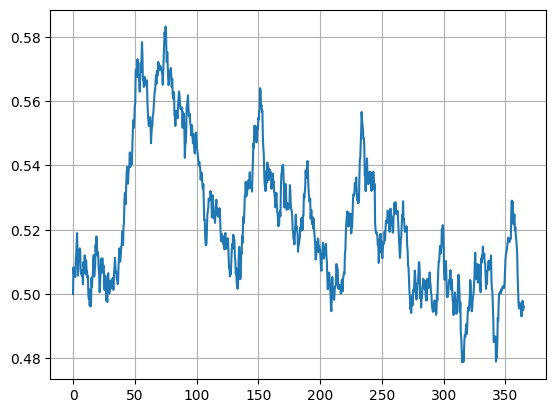

In [ ]:
N = 1000
T = 365
mu = 0.5
t = np.linspace(0, T, N + 1)

x, half_time = half_mean_reversed(3, mu, N)

plt.plot(t, x)
print(np.ceil(half_time))
plt.grid()